In [170]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# IMPORTING DATA

In [171]:
spreadsheet = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')
spreadsheet

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


# DATA CLEANING

In [172]:
spreadsheet.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [173]:
spreadsheet=spreadsheet.dropna()
spreadsheet=spreadsheet.reset_index(drop=True)

In [174]:
spreadsheet.shape

(920, 8)

In [175]:
spreadsheet['Address'] = spreadsheet['Address'].apply(lambda x:x.split(',')[0])

In [176]:
def word_separator(string):
    list = string.split()
    word = []
    number = [] 
    for element in list:
        if element.isalpha() == True: 
            word.append(element)
        else:
            break
    word = ' '.join(word)
    return word



In [177]:
spreadsheet['Address'] = spreadsheet['Address'].apply(lambda x:word_separator(x))


In [178]:
spreadsheet['Address'].nunique()

605

In [179]:
spreadsheet=spreadsheet.drop(['Unnamed: 0'],axis=1)

In [180]:
spreadsheet.isnull().sum().sum()

0

In [181]:
df1= pd.DataFrame()
lb_make = LabelEncoder()
df1["Address"] = lb_make.fit_transform(spreadsheet["Address"])
df1["Zip"] = lb_make.fit_transform(spreadsheet["Zip"])
df1

,Address,Zip
0,61,690
1,285,418
2,598,748
3,487,433
4,592,254
...,...,...
915,435,744
916,275,218
917,481,393
918,250,735


In [182]:
spreadsheet['Address']=df1['Address']
spreadsheet['Zip']=df1['Zip']
spreadsheet

,Address,Zip,Price,Area,Room,Lon,Lat
0,61,690,685000.0,64,3,4.907736,52.356157
1,285,418,475000.0,60,3,4.850476,52.348586
2,598,748,850000.0,109,4,4.944774,52.343782
3,487,433,580000.0,128,6,4.789928,52.343712
4,592,254,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
915,435,744,750000.0,117,1,4.927757,52.354173
916,275,218,350000.0,72,3,4.890612,52.414587
917,481,393,350000.0,51,3,4.856935,52.363256
918,250,735,599000.0,113,4,4.965731,52.375268


same type

In [183]:
#spreadsheet.columns!= 'Address' 

In [184]:
spreadsheet

,Address,Zip,Price,Area,Room,Lon,Lat
0,61,690,685000.0,64,3,4.907736,52.356157
1,285,418,475000.0,60,3,4.850476,52.348586
2,598,748,850000.0,109,4,4.944774,52.343782
3,487,433,580000.0,128,6,4.789928,52.343712
4,592,254,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
915,435,744,750000.0,117,1,4.927757,52.354173
916,275,218,350000.0,72,3,4.890612,52.414587
917,481,393,350000.0,51,3,4.856935,52.363256
918,250,735,599000.0,113,4,4.965731,52.375268


# EDA

/home/young-shounen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

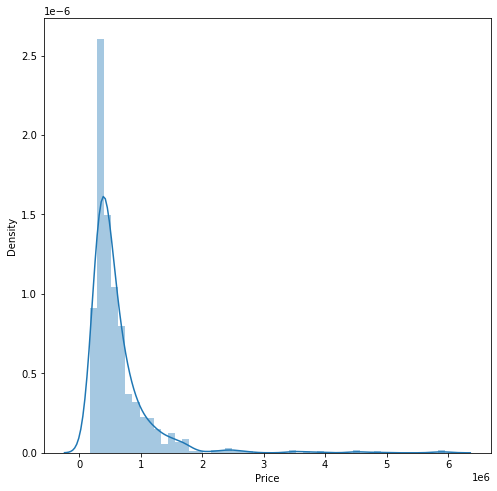

In [185]:
plt.figure(figsize=(8,8))
sns.distplot(spreadsheet['Price'])
plt.show

<AxesSubplot:>

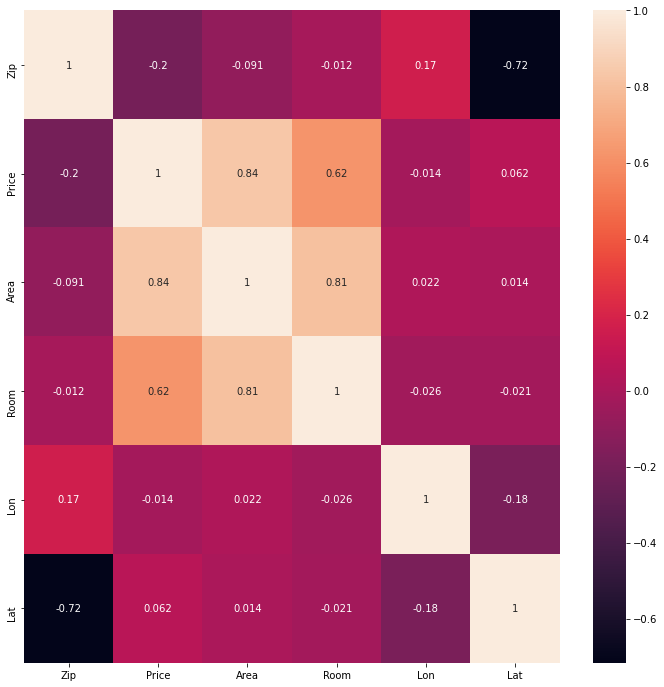

In [186]:
plt.figure(figsize=(12,12))
sns.heatmap(spreadsheet.iloc[:, 1:].corr(), annot = True)

as we can see the dependece of Zip has geatest negative value so we can drop it. 

In [187]:
spreadsheet=spreadsheet.drop(['Zip'],axis=1)

/home/young-shounen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/young-shounen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/young-shounen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

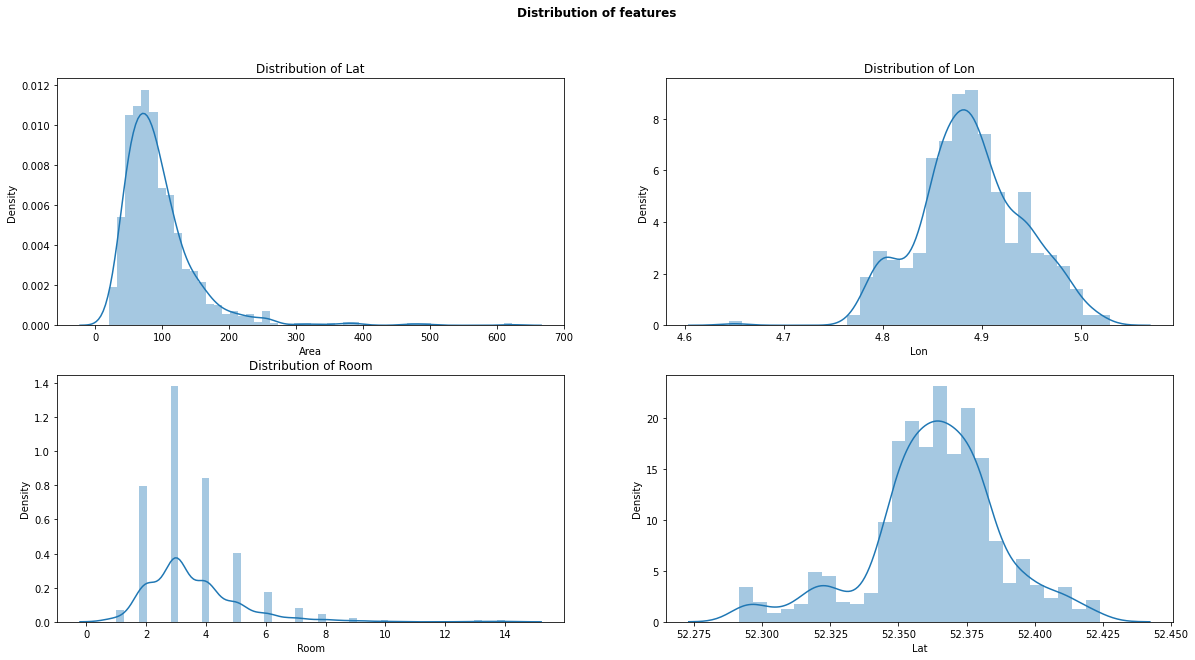

In [188]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)



sns.distplot(spreadsheet['Area'], ax=ax1)
ax1.set_title('Distribution of Area')
sns.distplot(spreadsheet['Lon'], ax=ax2)
ax2.set_title('Distribution of Lon')
sns.distplot(spreadsheet['Room'], ax=ax3)
ax3.set_title('Distribution of Room')
sns.distplot(spreadsheet['Lat'], ax=ax4)
ax1.set_title('Distribution of Lat')

plt.suptitle('Distribution of features', fontweight='bold')

plt.tight_layout
plt.show()

In [189]:
#spreadsheet=pd.get_dummies(spreadsheet)

In [190]:
#spreadsheet=spreadsheet.astype('float32') 

# Split & Normalize

In [191]:
label= spreadsheet['Price']
data=spreadsheet.drop(['Price'],axis=1)

In [192]:
train_data= data[:690]
train_label=label[:690]

In [193]:
test_data=data[690:]
test_label=label[690:]


In [194]:
train_label=np.array(train_label)
test_label=np.array(test_label)

In [195]:
train_label

array([ 685000.,  475000.,  850000.,  580000.,  720000.,  450000.,
        450000.,  590000.,  399000.,  300000.,  540000.,  539000.,
        390000.,  575000.,  650000.,  475000.,  700000.,  325000.,
        399000.,  375000., 1625000.,  575000.,  600000.,  525000.,
        350000.,  350000.,  575000.,  375000., 1650000.,  325000.,
        800000., 1950000.,  735000., 3925000.,  475000.,  275000.,
        375000.,  570000.,  375000.,  895000.,  365000.,  550000.,
        325000.,  429000.,  650000.,  350000.,  475000.,  325000.,
        425000.,  350000.,  350000.,  375000.,  450000., 1185000.,
        385000.,  687500.,  585000., 1295000.,  375000.,  500000.,
        300000.,  375000.,  400000.,  850000.,  550000.,  275000.,
        330000.,  700000.,  500000.,  369000.,  245000.,  350000.,
        425000.,  375000.,  335000.,  450000.,  395000.,  300000.,
        450000.,  415000.,  650000.,  425000.,  469000.,  485000.,
        225000.,  285000.,  995000., 1475000.,  475000.,  4750

In [196]:
train_data

,Address,Area,Room,Lon,Lat
0,61,64,3,4.907736,52.356157
1,285,60,3,4.850476,52.348586
2,598,109,4,4.944774,52.343782
3,487,128,6,4.789928,52.343712
4,592,138,5,4.902503,52.410538
...,...,...,...,...,...
685,214,80,4,4.882011,52.330956
686,43,87,2,4.942751,52.373127
687,426,76,2,4.922699,52.355605
688,310,90,4,4.886718,52.380687


normalize

In [197]:
#.iloc[:,1:]

In [198]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [199]:
test_data

,Address,Area,Room,Lon,Lat
690,-0.966573,-0.357683,-0.348176,-0.268905,0.088063
691,-0.726821,0.012309,0.277453,1.232323,-1.833256
692,-1.150569,-0.357683,-0.348176,0.979220,-0.229896
693,-0.146954,-0.845400,-0.973805,-0.520407,0.084783
694,1.693006,-0.895854,-0.973805,0.842334,0.122037
...,...,...,...,...,...
915,0.773026,0.348665,-1.599434,0.711835,-0.355266
916,-0.119076,-0.408137,-0.348176,0.003570,2.091139
917,1.029505,-0.761311,-0.348176,-0.638568,0.012541
918,-0.258467,0.281394,0.277453,1.435907,0.498955


In [200]:
#train_data=pd.get_dummies(train_data)

In [201]:
#test_data=pd.get_dummies(test_data)

In [202]:
test_data

,Address,Area,Room,Lon,Lat
690,-0.966573,-0.357683,-0.348176,-0.268905,0.088063
691,-0.726821,0.012309,0.277453,1.232323,-1.833256
692,-1.150569,-0.357683,-0.348176,0.979220,-0.229896
693,-0.146954,-0.845400,-0.973805,-0.520407,0.084783
694,1.693006,-0.895854,-0.973805,0.842334,0.122037
...,...,...,...,...,...
915,0.773026,0.348665,-1.599434,0.711835,-0.355266
916,-0.119076,-0.408137,-0.348176,0.003570,2.091139
917,1.029505,-0.761311,-0.348176,-0.638568,0.012541
918,-0.258467,0.281394,0.277453,1.435907,0.498955


In [203]:
train_data=train_data.values
test_data=test_data.values


divide the price with 100,000 for easy calculaion. 

In [204]:
test_label=test_label/100000
train_label=train_label/100000

In [205]:
test_label[0]

6.75

In [206]:
test_data[2].shape

(5,)

# Model

In [207]:
test_data.shape,test_label.shape

((230, 5), (230,))

In [208]:
train_data.shape,train_label.shape

((690, 5), (690,))

In [209]:
train_data[2].shape

(5,)

In [210]:
train_data[2].shape

(5,)

In [211]:
from keras import backend as K
def pearson_r(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.sum(xm * ym)
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = K.sqrt(x_square_sum * y_square_sum)
    r = r_num / r_den
    return K.mean(r)

In [212]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae', pearson_r])
    return model

In [44]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [47]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_label[:i * num_val_samples],train_label[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae,p = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [48]:
len(train_data), num_val_samples

(690, 172)

In [49]:
all_scores

[0.9601241946220398,
 2.4160633087158203,
 0.7550127506256104,
 1.0191755294799805]

In [50]:
np.mean(all_scores) ##########################################################

1.2875939458608627

Saving the validation logs at each fold

In [51]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_label[:i * num_val_samples],train_label[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [52]:
all_mae_histories

[[1.9385877847671509,
  1.5089102983474731,
  1.284586787223816,
  1.2770378589630127,
  1.0991507768630981,
  1.009658694267273,
  1.1312721967697144,
  1.0194429159164429,
  1.0196560621261597,
  1.0047025680541992,
  0.9735046029090881,
  0.8699319362640381,
  0.9386049509048462,
  0.9881017804145813,
  0.9145037531852722,
  1.005873203277588,
  0.9887931942939758,
  0.9417353868484497,
  0.9224090576171875,
  0.9209405779838562,
  0.9417577385902405,
  0.9307143688201904,
  0.8778092861175537,
  0.8665754795074463,
  0.850735604763031,
  0.9393609762191772,
  0.9138196706771851,
  0.9197643995285034,
  0.933696985244751,
  0.9329323172569275,
  1.0065631866455078,
  1.0118474960327148,
  0.9436065554618835,
  1.019998550415039,
  0.9516621828079224,
  0.9607820510864258,
  0.8734196424484253,
  0.9660779237747192,
  0.92940354347229,
  1.0226675271987915,
  1.0499608516693115,
  0.9142744541168213,
  0.9455512166023254,
  0.9814097285270691,
  0.8773354887962341,
  0.88743698596954

In [53]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history

[2.464625358581543,
 1.7678905725479126,
 1.622005045413971,
 1.4397605508565903,
 1.3480391204357147,
 1.281835600733757,
 1.3169479668140411,
 1.1896869540214539,
 1.3326903581619263,
 1.303657591342926,
 1.216641828417778,
 1.193907916545868,
 1.2389041483402252,
 1.2356245070695877,
 1.2138903588056564,
 1.2252111285924911,
 1.2496806532144547,
 1.170522764325142,
 1.172750562429428,
 1.2180651277303696,
 1.2270296514034271,
 1.1642964035272598,
 1.208344429731369,
 1.137090340256691,
 1.1463905423879623,
 1.151434749364853,
 1.2231069505214691,
 1.2568011730909348,
 1.2333023697137833,
 1.144578143954277,
 1.2602580189704895,
 1.1824210435152054,
 1.1744570881128311,
 1.2110060006380081,
 1.193649783730507,
 1.213063731789589,
 1.2205768823623657,
 1.2569695115089417,
 1.178163319826126,
 1.2064770609140396,
 1.2322410941123962,
 1.142187461256981,
 1.1757293790578842,
 1.1943319439888,
 1.1974712908267975,
 1.2035336196422577,
 1.2865302115678787,
 1.1826134473085403,
 1.21117477

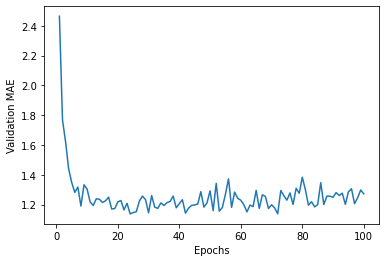

In [54]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

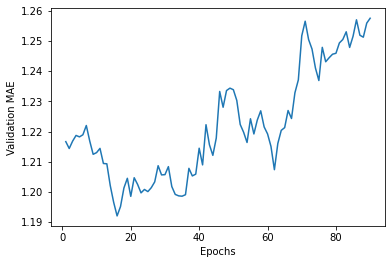

In [55]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

its apparent that after 35 epochs, data starts to overfit.

In [213]:
model = build_model()
histoty=model.fit(train_data, train_label,epochs=18, batch_size=16,verbose=)

Epoch 1/18
44/44 [==============================] - 0s 1ms/step - loss: 46.2901 - mae: 4.5023 - pearson_r: 0.3162
Epoch 2/18
44/44 [==============================] - 0s 1ms/step - loss: 21.7163 - mae: 2.7539 - pearson_r: 0.4645
Epoch 3/18
44/44 [==============================] - 0s 1ms/step - loss: 14.2180 - mae: 2.3234 - pearson_r: 0.6384
Epoch 4/18
44/44 [==============================] - 0s 1ms/step - loss: 12.4119 - mae: 2.1401 - pearson_r: 0.7385
Epoch 5/18
44/44 [==============================] - 0s 1ms/step - loss: 11.1776 - mae: 1.9597 - pearson_r: 0.7567
Epoch 6/18
44/44 [==============================] - 0s 1ms/step - loss: 10.2955 - mae: 1.8436 - pearson_r: 0.7403
Epoch 7/18
44/44 [==============================] - 0s 1ms/step - loss: 9.5480 - mae: 1.7381 - pearson_r: 0.7712
Epoch 8/18
44/44 [==============================] - 0s 1ms/step - loss: 8.9806 - mae: 1.6587 - pearson_r: 0.8272
Epoch 9/18
44/44 [==============================] - 0s 1ms/step - loss: 8.4876 - mae: 1.58

In [167]:
 test_mse_score, test_mae_score, pearson_r =model.evaluate(test_data, test_label)

8/8 [==============================] - 0s 1ms/step - loss: 3.7391 - mae: 1.0211 - pearson_r: 0.9055


In [168]:
test_mae_score

1.0210896730422974

In [59]:
A=model.predict(test_data)

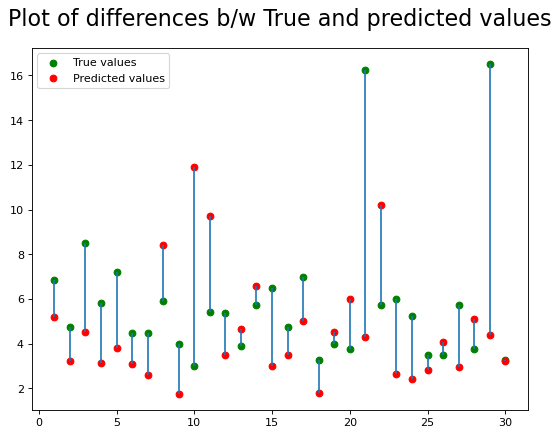

In [64]:
from matplotlib.pyplot import figure

figure(figsize=(8,6), dpi=80)
true_vals = np.array(train_label[:30])
predicted = np.array(A[:30])
X = range(1, len(predicted)+1)

#dy = (np.random.rand(20)-0.5)*0.5


plt.scatter(X, true_vals, color='green', label='True values')
plt.scatter(X, predicted, color='red', label='Predicted values')

plt.vlines(X,true_vals,predicted)#,predicted+dy)


#differences = abs(true_vals-predicted)
#differences = [round(i, 1) for i in differences]


#for i, label in enumerate(differences):
    #plt.annotate('Δ = {}'.format(label), (X[i]+0.20, predicted[i]+0.05))
plt.title('Plot of differences b/w True and predicted values', fontsize=20, pad=20)
plt.legend()